In [11]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
sns.set(color_codes=True)

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

plt.style.use('bmh')
pd.options.display.max_columns = 30
np.random.seed(sum(map(ord, "distributions")))
import seaborn as sns
sns.set_style("whitegrid")


In [12]:
cwd = os.getcwd()
cwd

'/home/joao/foundations_of_data_science'

In [13]:
atletas_all_years = pd.DataFrame()
clubes_all_years = pd.DataFrame()
partidas_all_years = pd.DataFrame()
posicoes_all_years = pd.DataFrame()
scouts_all_years = pd.DataFrame()
status_all_years = pd.DataFrame()


for i in range(2014, 2018):
    
    path_atl = os.path.join(cwd, str(i)+"/Atletas.csv")    
    path_club = os.path.join(cwd, str(i)+"/Clubes.csv")    
    path_part = os.path.join(cwd, str(i)+"/Partidas.csv")    
    path_pos = os.path.join(cwd, str(i)+"/Posicoes.csv")   
    path_sct = os.path.join(cwd, str(i)+"/Scouts.csv")    
    path_stts = os.path.join(cwd, str(i)+"/Status.csv")
    
    atletas = pd.read_csv(path_atl)
    atletas['Ano'] = i
    clubes = pd.read_csv(path_club)
    #clubes['Ano'] = i
    partidas = pd.read_csv(path_part)
    partidas['Ano'] = i
    posicoes = pd.read_csv(path_pos)
    #posicoes['Ano'] = i
    scouts = pd.read_csv(path_sct)
    scouts['Ano'] = i
    status = pd.read_csv(path_stts)
    #status['Ano'] = i
    
    atletas_all_years = atletas_all_years.append(atletas).drop_duplicates()
    clubes_all_years = clubes_all_years.append(clubes).drop_duplicates()
    partidas_all_years = partidas_all_years.append(partidas)
    posicoes_all_years = posicoes_all_years.append(posicoes).drop_duplicates()
    scouts_all_years = scouts_all_years.append(scouts)
    status_all_years = status_all_years.append(status).drop_duplicates()

In [14]:
atletas_all_years.shape

(4210, 5)

In [15]:
atletas_all_years = atletas_all_years.drop_duplicates(['ID'])

In [16]:
scouts_all_years.shape

(125016, 27)

### Adicionando o nome do jogador, time e posição

In [17]:
scouts_all_years = scouts_all_years.merge(atletas_all_years[['ID','Apelido','PosicaoID']], left_on='AtletaID',\
                         right_on='ID',how = 'inner')
scouts_all_years = scouts_all_years.drop_duplicates()
scouts_all_years = scouts_all_years.merge(posicoes_all_years[['ID','Abreviacao']], left_on = 'PosicaoID',right_on = 'ID')
scouts_all_years = scouts_all_years.drop(labels=['ID_y','ID_x'], axis = 1)

In [19]:
scouts_all_years.head()

,Rodada,ClubeID,AtletaID,Participou,Pontos,PontosMedia,Preco,PrecoVariacao,FS,PE,A,FT,FD,FF,G,I,PP,RB,FC,GC,CA,CV,SG,DD,DP,GS,Ano,Apelido,PosicaoID,Abreviacao
0,0,285.0,36443,False,0.0,0.00,9.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2014,Dida,1,GOL
1,1,285.0,36443,True,5.0,5.00,10.60,1.60,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2014,Dida,1,GOL
2,2,285.0,36443,True,-3.0,1.00,8.27,-2.33,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2014,Dida,1,GOL
3,3,285.0,36443,True,-2.6,-0.20,6.81,-1.46,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2014,Dida,1,GOL
4,4,285.0,36443,True,4.0,0.85,7.96,1.15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,2014,Dida,1,GOL


In [20]:
print('Tamanho antes de deixar apenas quem jogou')
print(scouts_all_years.shape)
jogaram_all_years = scouts_all_years[scouts_all_years.Participou==True]
print('Tamanho depois de deixar apenas quem jogou')
print(jogaram_all_years.shape)

Tamanho antes de deixar apenas quem jogou
(125016, 30)
Tamanho depois de deixar apenas quem jogou
(43927, 30)


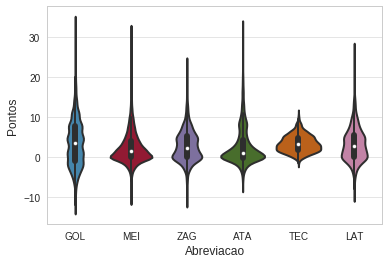

In [22]:
ax = sns.violinplot(data = jogaram_all_years, x='Abreviacao', y="Pontos")

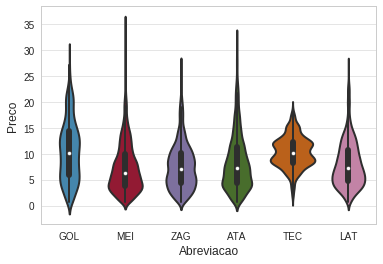

In [26]:
ax = sns.violinplot(data = jogaram_all_years, x='Abreviacao', y="Preco")

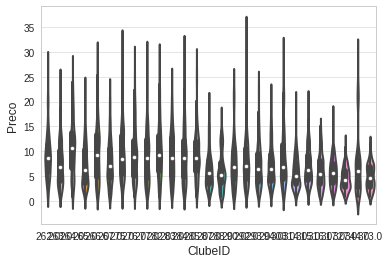

In [31]:
ax = sns.violinplot(data = jogaram_all_years, x='ClubeID', y="Preco")

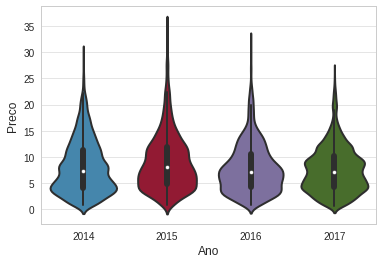

In [24]:
ax = sns.violinplot(data = jogaram_all_years, x='Ano', y="Preco")

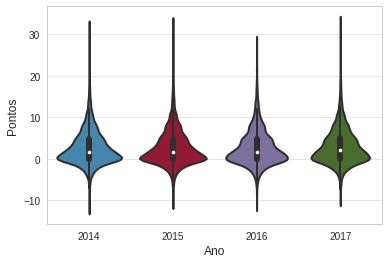

In [25]:
ax = sns.violinplot(data = jogaram_all_years, x='Ano', y="Pontos")

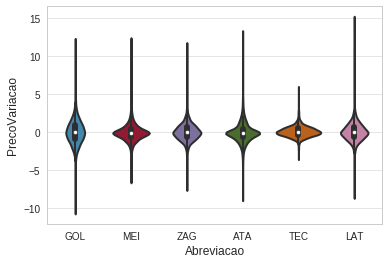

In [28]:
ax = sns.violinplot(data = jogaram_all_years, x='Abreviacao', y="PrecoVariacao")

In [ ]:
jogaram_all_years.groupby(['ClubeID','Ano']).mean().reset_index().head(10)

In [ ]:
jogaram_all_years.Pontos

# Gerando tabela com partidas

In [ ]:
partidas_all_years.head()

In [ ]:
clubes_all_years.head()

In [ ]:
def gera_partidas_com_clubes(partidas_all_years, clubes_all_years):
    partidas_all_years = partidas_all_years.merge(clubes_all_years[['ID','Abreviacao']], how='inner', left_on='CasaID',\
                         right_on='ID')
    partidas_all_years = partidas_all_years.merge(clubes_all_years[['ID','Abreviacao']], how='inner', left_on='VisitanteID',\
                         right_on='ID')
    partidas_all_years = partidas_all_years.drop(labels=['ID_y','ID'], axis = 1)
    partidas_com_clubes = partidas_all_years.rename(columns={'ID_x':'ID_partida','Abreviacao_x':'abrev_clube_casa','Abreviacao_y':'abrev_clube_fora'})
    return partidas_com_clubes

def remove_erros_SPO(partidas_com_clubes):
    a = partidas_com_clubes.copy().drop_duplicates()
    temp = pd.DataFrame(a.groupby(['ID_partida'])['ID_partida'].count())
    temp2 = temp[temp.ID_partida == 2]
    
    a = a[(a.ID_partida.isin(temp2.index))]
    a = a[(a.abrev_clube_casa == 'SPO') | (a.abrev_clube_fora == 'SPO')]
    
    final = partidas_com_clubes[~partidas_com_clubes.index.isin(a.index)]
    partidas_com_clubes_corrigido = final.drop_duplicates()
    
    return partidas_com_clubes_corrigido

def adiciona_pontuacao(partidas_com_clubes_corrigido):
    def pts_casa(casa, fora):
        if casa > fora:
            a = 3
        elif casa < fora:
            a = 0
        else:
            a = 1
        return a

    def pts_fora(casa, fora):
        if casa > fora:
            a = 0
        elif casa < fora:
            a = 3
        else:
            a = 1
        return a
    
    a = partidas_com_clubes_corrigido.copy().drop_duplicates().reset_index()
    a['pts_casa'] = a.apply(lambda x: pts_casa(x.PlacarCasa, x.PlacarVisitante), axis=1)
    a['pts_fora'] = a.apply(lambda x: pts_fora(x.PlacarCasa, x.PlacarVisitante), axis=1)
    
    partidas_com_pontuacao = a
    
    return partidas_com_pontuacao

def gera_classificacao(partidas_com_pontuacao):
    b = partidas_com_pontuacao.copy()
    casa = pd.DataFrame(b.groupby(['Ano','abrev_clube_casa'])['pts_casa'].sum())
    fora = pd.DataFrame(b.groupby(['Ano','abrev_clube_fora'])['pts_fora'].sum())
    tabela = pd.concat([casa, fora], axis=1)
    tabela['pts_total'] = tabela.pts_casa + tabela.pts_fora
    tabela = tabela.reset_index().sort_values(by=['Ano','pts_total'], ascending = [True, False])
    return tabela

In [ ]:
partidas_com_clubes = gera_partidas_com_clubes(partidas_all_years, clubes_all_years).drop_duplicates()

partidas_com_clubes_corrigido = remove_erros_SPO(partidas_com_clubes)

partidas_com_pontuacao = adiciona_pontuacao(partidas_com_clubes_corrigido)

tabela = gera_classificacao(partidas_com_pontuacao)

tabela

In [ ]:
partidas_com_clubes_corrigido

In [ ]:
partidas_com_clubes_corrigido.to_csv('partidas_all_years.csv', sep='\t')

# Gerando tabela com atletas

In [ ]:
atletas_all_years.head()

In [ ]:
clubes_all_years.head()

In [ ]:
posicoes_all_years

In [ ]:
atletas_all_years = atletas_all_years.merge(clubes_all_years[['ID','Abreviacao','Nome']], how='inner', left_on='ClubeID',\
                         right_on='ID')

atletas_all_years = atletas_all_years.merge(posicoes_all_years[['ID','Abreviacao']], how='inner', left_on='PosicaoID',\
                         right_on='ID')

atletas_all_years = atletas_all_years.drop(labels=['ID_y','ID'], axis = 1)

In [ ]:
atletas_all_years = atletas_all_years.rename(columns={'ID_x':'ID_jogador','Nome':'nome_clube','Abreviacao_x':'abrev_clube',\
                                                     'Abreviacao_y':'posicao'})

In [ ]:
atletas_all_years.head()

In [ ]:
atletas_all_years = atletas_all_years.drop_duplicates()

In [ ]:
atletas_all_years.to_csv('atletas_all_years.csv', sep='\t')

In [ ]:
scouts_all_years[scouts_all_years.Participou==False]

In [ ]:
atletas_all_years[atletas_all_years.PosicaoID == 6].sort_values('ID_jogador')

In [ ]:
#GERANDO PONTUAÇÃO DOS CLUBES RODADA A RODADA
scouts_all_years[scouts_all_years.AtletaID.isin(atletas_all_years.ID_jogador[atletas_all_years.PosicaoID == 6])][['Ano','Rodada','ClubeID','AtletaID','Participou','Pontos']]

# Exploratory Data Analysis

In [ ]:
atletas_all_years.info()

In [ ]:
partidas_all_years.info()

In [ ]:
sns.jointplot(x="ClubeID", y="PosicaoID", data=atletas_all_years[atletas_all_years.Ano == 2017], size=6, xlim=[250,400]);

In [ ]:
list(set(atletas_all_years.dtypes.tolist()))

In [ ]:
df_num = atletas_all_years.select_dtypes(include = ['float64', 'int64'])
df_num.head()

In [ ]:
scouts_all_years

In [ ]:
atletas_all_years.Ano.value_counts()

In [ ]:
atletas_all_years.hist(figsize=(8, 8), bins=50, xlabelsize=8, ylabelsize=8);

In [ ]:
atletas_all_years.sample(10).sort_values("ID_jogador")